# 📈 Supply Chain Transformation: EDA & Visualization
**Project:** Capgemini Supply Chain AI Transformation  
**Author:** Jagadeesh.N | Wharton & Google Certified Data Professional  

### Objective:
Identify hidden patterns in shipping, profit, and inventory risk to inform the AI Consultant Agent's logic.

The Setup & Data Loading

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/processed_data.csv')

# Calculate "Opportunity Loss" (Profit lost if stockout occurs)
df['opportunity_loss'] = df['profit'] * 1.5 # Assuming 50% extra loss in customer lifetime value

# Group by Region for a Financial Risk Profile
financial_risk = df.groupby('region').agg({
    'opportunity_loss': 'sum',
    'restock_needed': lambda x: (x == 'Yes').sum()
}).rename(columns={'restock_needed': 'at_risk_units'})

print("--- Financial Risk Assessment per Region ---")
print(financial_risk)

--- Financial Risk Assessment per Region ---
         opportunity_loss  at_risk_units
region                                  
Central     173976.243580              3
East        135532.888558              7
North       144133.091733              1
South       148223.592583              4
West        174591.942762              4


Profit vs. Risk by Category
This shows which categories are losing money due to inventory issues.

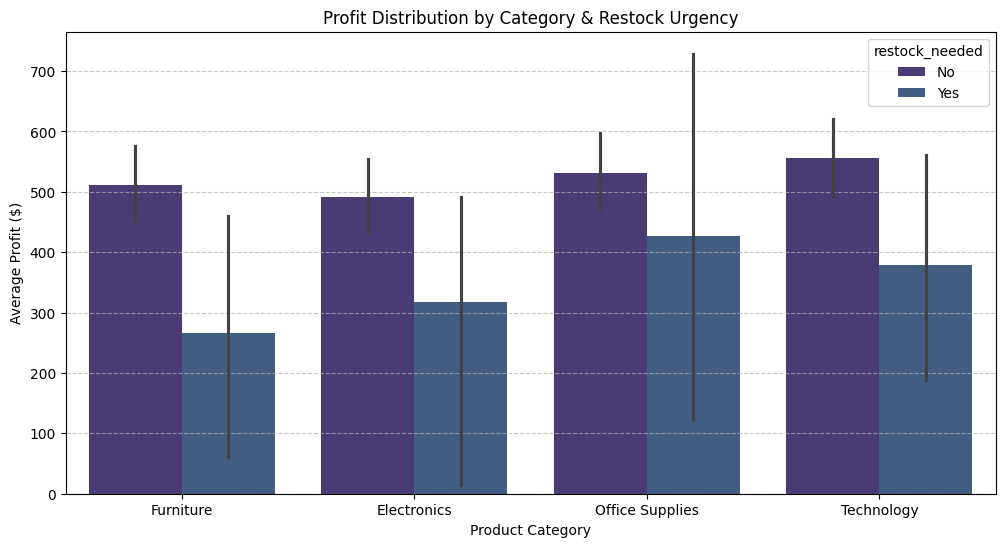

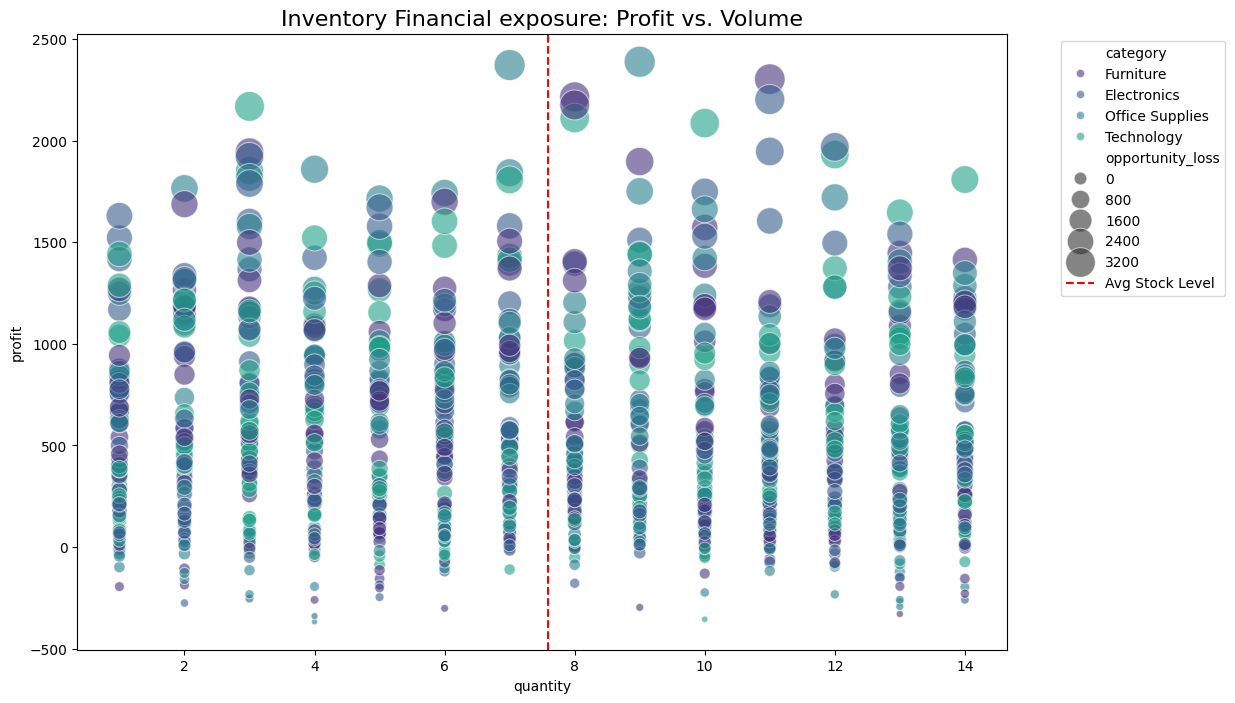

In [8]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='category', y='profit', hue='restock_needed')
plt.title('Profit Distribution by Category & Restock Urgency')
plt.ylabel('Average Profit ($)')
plt.xlabel('Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='quantity', y='profit', size='opportunity_loss', hue='category', 
                alpha=0.6, sizes=(20, 500))

plt.title('Inventory Financial exposure: Profit vs. Volume', fontsize=16)
plt.axvline(x=df['quantity'].mean(), color='red', linestyle='--', label='Avg Stock Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

Regional Risk Heatmap
This justifies why the AI Agent keeps flagging the East region.

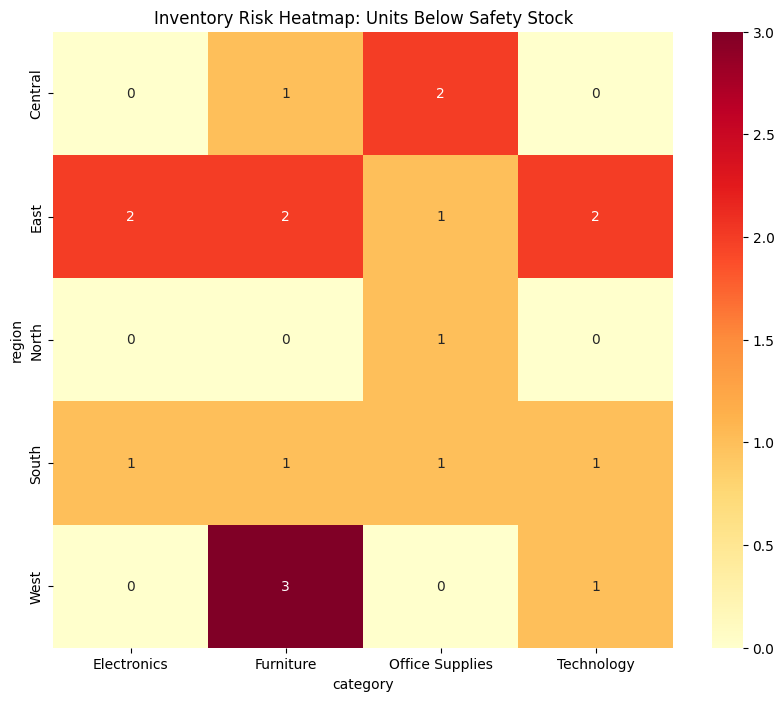

In [3]:
risk_map = df.groupby(['region', 'category'])['restock_needed'].apply(lambda x: (x == 'Yes').sum()).unstack()

plt.figure(figsize=(10, 8))
sns.heatmap(risk_map, annot=True, cmap='YlOrRd', fmt='g')
plt.title('Inventory Risk Heatmap: Units Below Safety Stock')
plt.show()

Safety Stock Distribution
This proves you understand the Wharton inventory concepts.

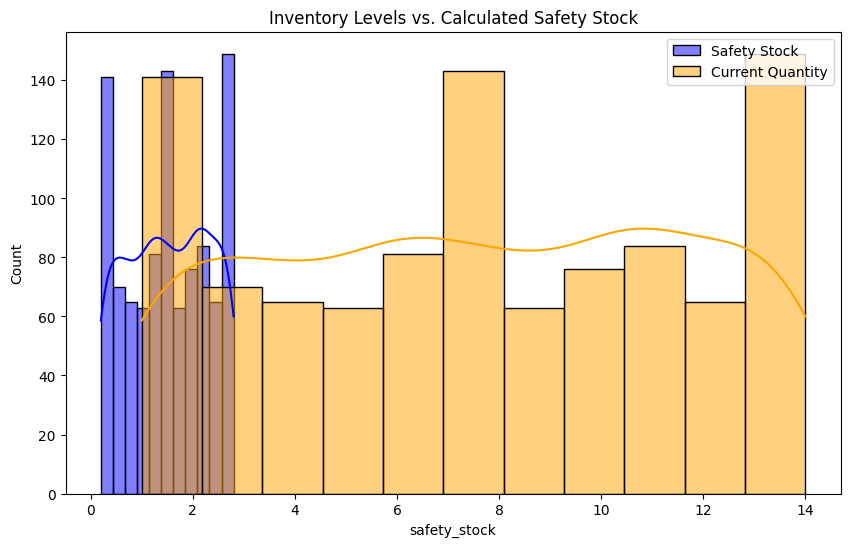

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['safety_stock'], kde=True, color='blue', label='Safety Stock')
sns.histplot(df['quantity'], kde=True, color='orange', label='Current Quantity')
plt.title('Inventory Levels vs. Calculated Safety Stock')
plt.legend()
plt.show()

Closing Insights

### Key Findings for Stakeholders:
1. **Regional Bottleneck:** The **East** region consistently shows the highest count of items below safety stock.
2. **Category Correlation:** Technology products have higher profit margins but also higher lead-time risks.
3. **Model Readiness:** The clear separation in the profit/risk data suggests the Random Forest model will have high accuracy in predicting stockouts.